# Fake news classifier with NLP.

Problem statement:
>The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

In this project we are going to classify the Fake news with the data given.

In [1]:
#imprting the required libraries
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### Data- Description:
There are 6 columns in the dataset provided to you. The description of each of the column is given below:
1. “id”:  Unique id of each news article
2. “headline”:  It is the title of the news.
3. “news”:  It contains the full text of the news article
4. “Unnamed:0”:  It is a serial number
5. “written_by”:  It represents the author of the news article
6. “label”:  It tells whether the news is fake (1) or not fake (0).


In [2]:
df = pd.read_csv(r"C:\Users\HP\Documents\GitHub\Flip-Robo-Projects\Fake news classifier Project with NLP\Project sources\train_news.csv",  index_col =0)
df

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


### EDA.
Starting the EDA with general play around with the data.

In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.duplicated().sum()

109

In [5]:
df = df.drop_duplicates() #Droping duplicate records.

In [6]:
df.isnull().sum()

headline       518
written_by    1932
news            39
label            0
dtype: int64

In [7]:
df.written_by.replace(np.nan, 'not_avaliable', inplace = True) #Filling Auther name as not_avaliable inplace of null variable.

In [8]:
df.dropna(subset=['headline','news'],inplace=True)   #droping headline and news null values.

In [9]:
df.head(20)

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,Whatever the Outcome on November 8th the US Wi...,not_avaliable,Taming the corporate media beast Whatever the ...,1
6,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
7,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
9,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
10,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1


In [10]:
df.label.value_counts()

0    10387
1     9747
Name: label, dtype: int64

#### We have a balanced data it will be much helpfull for better prediction.

<AxesSubplot:xlabel='label', ylabel='count'>

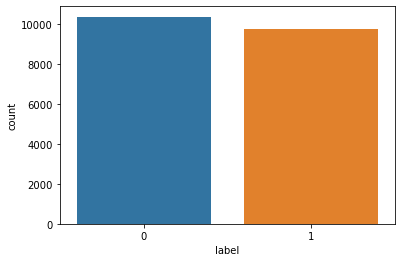

In [11]:
sns.countplot(df.label)

In [12]:
fake_news = df[(df.label==1)]
percent=len(fake_news)/len(df)*100
print('Percentage of Fake = ',percent)
print('Percentage of not Fake news= ', (100-percent))

Percentage of Fake =  48.41064865401808
Percentage of not Fake news=  51.58935134598192


we have a balanced data...

### Data Clensing

Iam trying ot check what is the totall length of each senterence before cleaning the senterence. 

In [19]:
df['length_before_cleaning1'] = df['headline'].map(lambda headline: len(headline))
df['length_before_cleaning2'] = df['news'].map(lambda news: len(news))
df

,headline,written_by,news,label,length_before_cleaning1,length_before_cleaning2
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28,9164
...,...,...,...,...,...,...
20794,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0,68,19894
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,43,6621
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,84,3433
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,55,2334


In [15]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [17]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [20]:
#Replacing '\n' in comment_text
df['headline'] = df['headline'].replace('\n',' ')
df['written_by'] = df['written_by'].replace('\n',' ')
df['news'] = df['news'].replace('\n',' ')


In [21]:
df['headline'] =df['headline'].apply(clean_comments)
df['headline']

0        ethic question dogged agriculture nominee geor...
1        u must dig deep stop argentina lionel messi ne...
2        cotton house walk plank vote bill pas senate b...
3        paul lepage besieged maine governor sends conf...
4                                        digital trump win
                               ...                        
20794    one police shift patrolling anxious america ne...
20796                  albert pike european migrant crisis
20797    dakota access caught infiltrating protest inci...
20798                stretch summer solstice new york time
20799    emory university pay percent undocumented stud...
Name: headline, Length: 20134, dtype: object

In [22]:
df['news'] = df['news'].apply(clean_comments)
df['news']

0        washington sonny perdue telling georgian growi...
1        houston venezuela plan tactical approach desig...
2        sunday abc week discussing republican plan rep...
3        augusta beleaguered republican governor maine ...
4        finian cunningham written extensively internat...
                               ...                        
20794    policing america today rib dinner paid strange...
20796    rixon stewart november rixon stewart nov migra...
20797    posted eddie know dakota access pipeline prote...
20798    officially summer society boutique society mem...
20799    emory university atlanta georgia announced fun...
Name: news, Length: 20134, dtype: object

In [23]:
df['length_after_cleaning1'] = df['headline'].map(lambda headline: len(headline))
df['length_after_cleaning2'] = df['news'].map(lambda news: len(news))
df

,headline,written_by,news,label,length_before_cleaning1,length_before_cleaning2,length_after_cleaning1,length_after_cleaning2
0,ethic question dogged agriculture nominee geor...,Eric Lipton and Steve Eder,washington sonny perdue telling georgian growi...,0,84,7936,72,5246
1,u must dig deep stop argentina lionel messi ne...,David Waldstein,houston venezuela plan tactical approach desig...,0,72,6112,57,3947
2,cotton house walk plank vote bill pas senate b...,Pam Key,sunday abc week discussing republican plan rep...,0,100,425,54,259
3,paul lepage besieged maine governor sends conf...,Jess Bidgood,augusta beleaguered republican governor maine ...,0,100,6516,84,4325
4,digital trump win,Finian Cunningham,finian cunningham written extensively internat...,1,28,9164,17,6515
...,...,...,...,...,...,...,...,...
20794,one police shift patrolling anxious america ne...,The New York Times,policing america today rib dinner paid strange...,0,68,19894,57,12058
20796,albert pike european migrant crisis,Rixon Stewart,rixon stewart november rixon stewart nov migra...,1,43,6621,35,4309
20797,dakota access caught infiltrating protest inci...,Eddy Lavine,posted eddie know dakota access pipeline prote...,1,84,3433,78,2490
20798,stretch summer solstice new york time,Alison S. Cohn,officially summer society boutique society mem...,0,55,2334,37,1588


In [24]:
#Checking Total length removal in dataset
print("Original Length:", df.length_before_cleaning1.sum())
print("Cleaned Length:", df.length_after_cleaning1.sum())
print("Total Words Removed:", (df.length_before_cleaning1.sum()) - (df.length_after_cleaning1.sum()))

Original Length: 1496123
Cleaned Length: 1152116
Total Words Removed: 344007


In [25]:
#Checking Total length removal in dataset
print("Original Length:", df.length_before_cleaning2.sum())
print("Cleaned Length:", df.length_after_cleaning2.sum())
print("Total Words Removed:", (df.length_before_cleaning2.sum()) - (df.length_after_cleaning2.sum()))

Original Length: 93907449
Cleaned Length: 62540918
Total Words Removed: 31366531


### FAKE WORD CLOUD

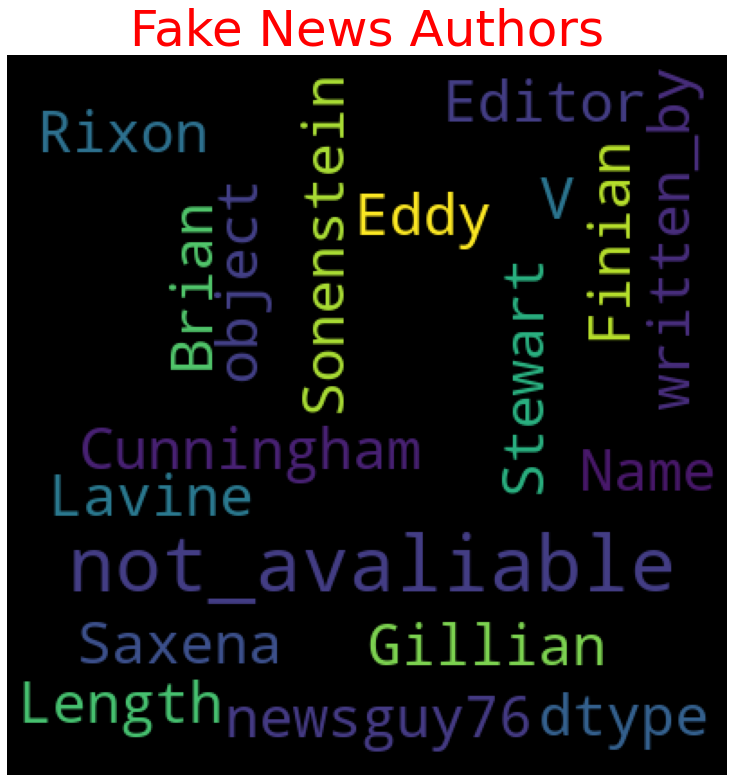

In [27]:
Fakenews_authors=df[(df['label']==1)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(Fakenews_authors['written_by']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Fake News Authors',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

### Key Observations:
1. We can evidently see that most of the fake news are  from "not_avaliable", "Dtype', "Length", "Editor" which mmeans these face news sources are not avaliable.
2. News without a proper author names are being a fake news.

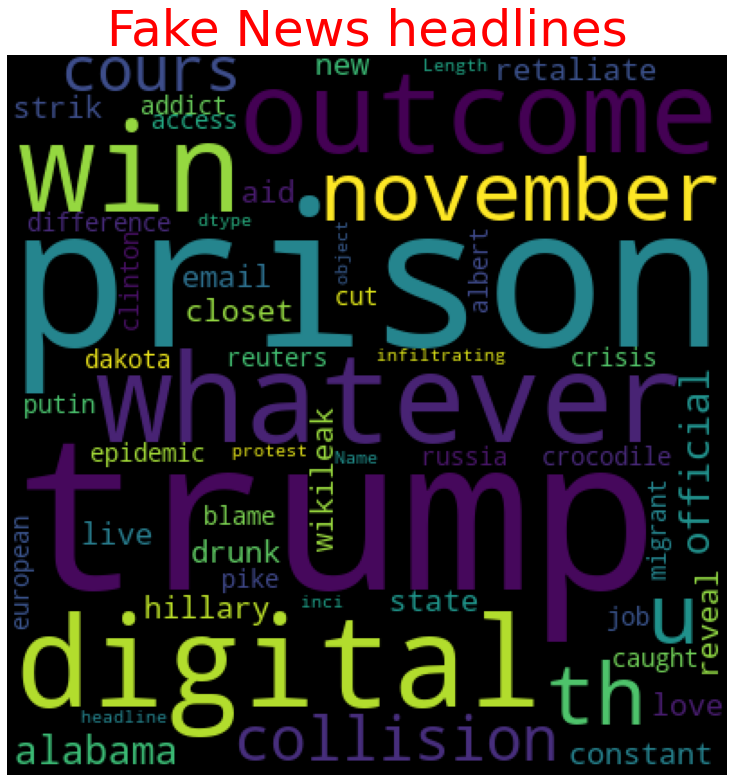

In [28]:
Fakenews_headlines=df[(df['label']==1)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(Fakenews_authors['headline']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Fake News headlines',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

### Key Observations:
1. Fake news have most repeated keywords Trump, Prison, win outcome. so any news on these keywords might be fake.

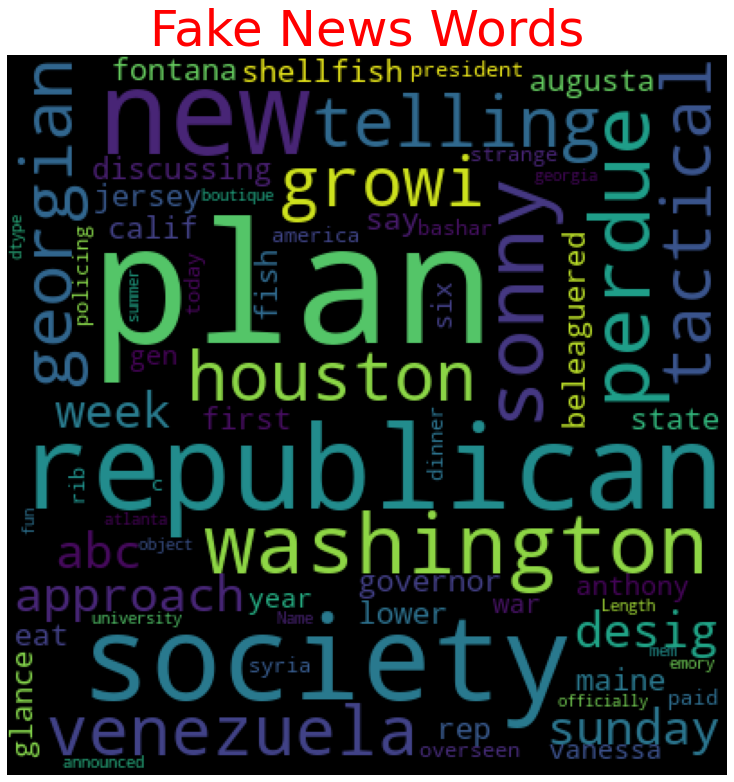

In [39]:
Fakenews=df[(df['label']==1)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(Fakenews_authors['news']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Fake News Words',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

### Key Observations:
1. Fake news have most repeated keywords Washington, republican, plan, Society so any news on these keywords might be fake

### NOT FAKE WORD CLOUD

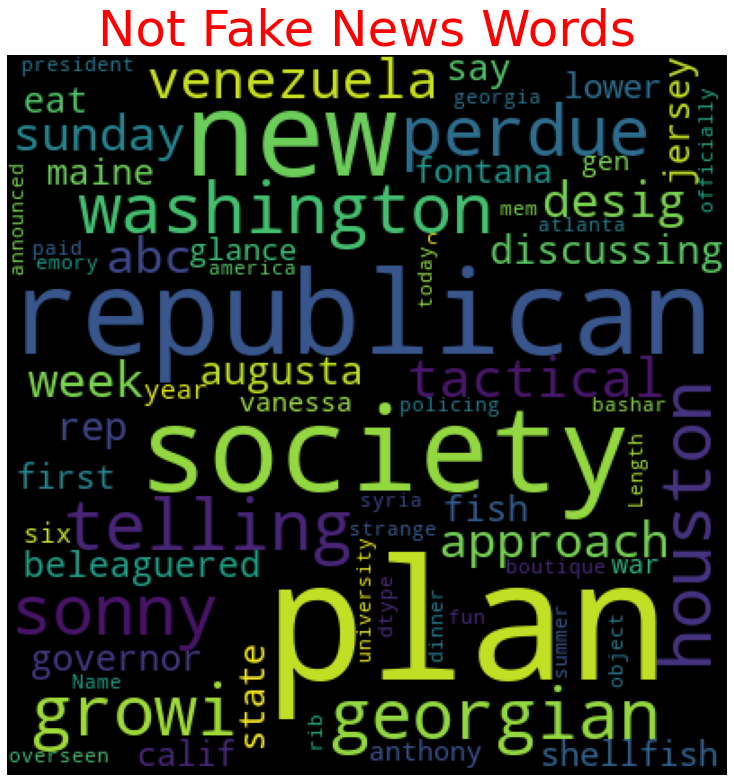

In [38]:
Fakenews=df[(df['label']==0)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(Fakenews_authors['news']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Not Fake News Words',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

### Key Observations:
1. Not Fake news have most repeated keywords Washington, republican, plan, Society which are as same as repeted words in fake new. So news wont be much helpfully in our predection.

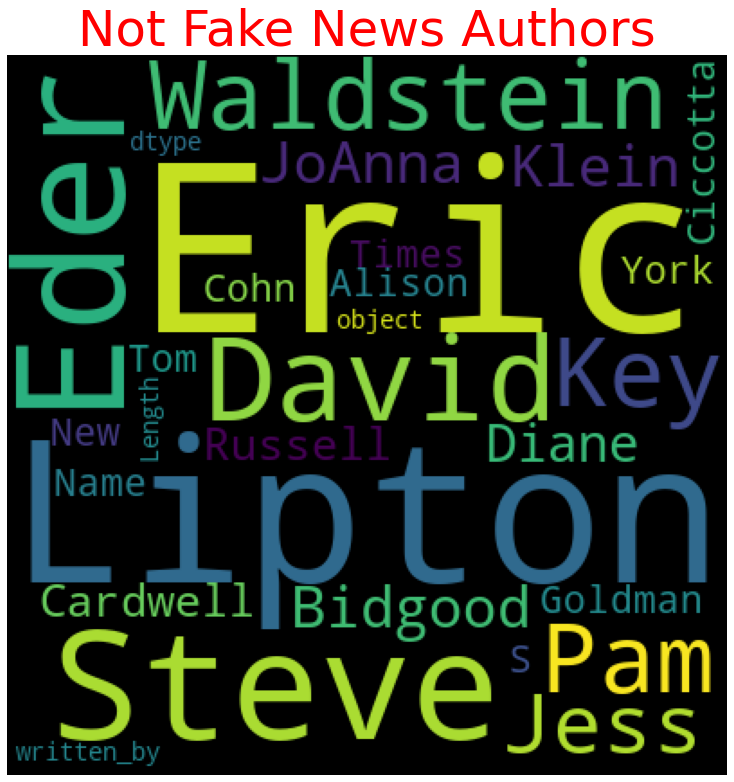

In [34]:
Fakenews_authors=df[(df['label']==0)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(Fakenews_authors['written_by']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Not Fake News Authors',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

### Key Observations:
1. In not fake news we can see many authors, which is a clear indication that if author names are avaliable that possibility of being not fake is high.

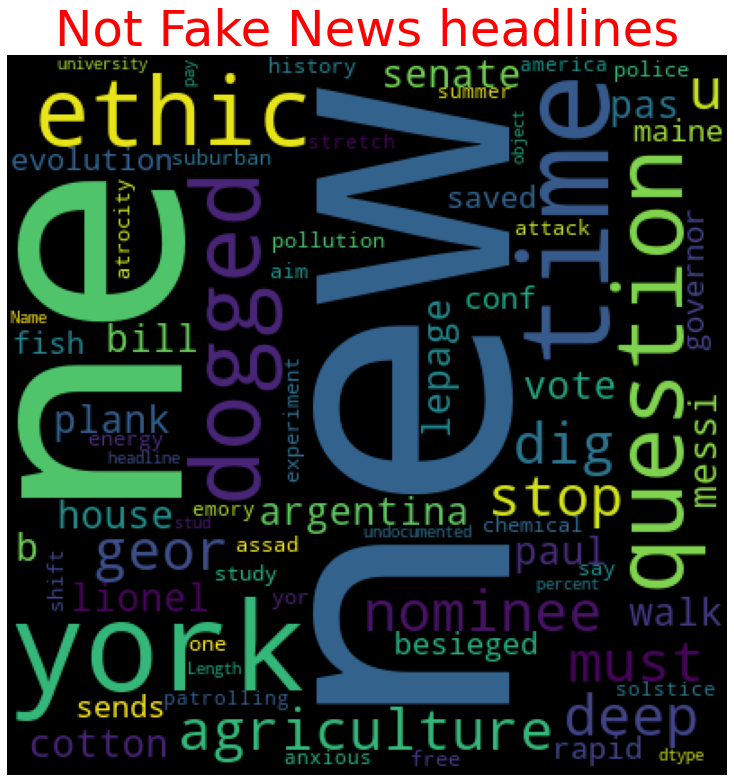

In [35]:
Fakenews_headlines=df[(df['label']==0)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(Fakenews_authors['headline']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Not Fake News headlines',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

### Key Observations:
1. In not fake headlines we can see New, ethic, time ,culture , question, agriculture, york.
2. We will use writtern by and headlines in our model building.

In [40]:
y =df['label']

In [57]:
DF = df[['headline','written_by']]

In [66]:
DF['X'] = DF['headline']+' '+ DF['written_by']

In [46]:
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [69]:
X = tf_vec.fit_transform(DF['X']) #Changing the words to TFIDF vectors

### Training the model

In [70]:
### Selecting parameters for training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 98.68891537544697 found on randomstate 244


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = best_rstate,stratify=y)

### Selecting the Best model for Training

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [75]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes

In [76]:
models = [LogisticRegression(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [77]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.9798675496688742 - (std: 0.002045489431984183)
Precision: 0.9802298570708292 - (std: 0.002011298900928146)
Recall: 0.9798675496688742 - (std: 0.002045489431984183)
f1: 0.9798724964828965 - (std: 0.002044931668667508)


Step 2 of 7
....................................................................running Random Forest
Accuracy: 0.9929139072847682 - (std: 0.0014296048440346394)
Precision: 0.9929531666509724 - (std: 0.0014093518662262577)
Recall: 0.9929139072847682 - (std: 0.0014296048440346394)
f1: 0.9929147515935417 - (std: 0.0014292622086308313)


Step 3 of 7
....................................................................running Decision Tree
Accuracy: 0.9920529801324504 - (std: 0.002030425128047137)
Precision: 0.9920601956401157 - (std: 0.0020293007426070995)
Recall: 0.9920529801324504 - (std: 0.002030425128047137)
f1: 0.9920531048649229 - (std: 0.00203024829

In [78]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
1,Random Forest,0.992914,0.992953,0.992914,0.992915
2,Decision Tree,0.992053,0.992060,0.992053,0.992053
6,XGBoost,0.988742,0.988852,0.988742,0.988744
4,Ada Boost,0.980066,0.980287,0.980066,0.980071
0,LogisticRegression,0.979868,0.980230,0.979868,0.979872
5,Gradient Boosting,0.965232,0.967185,0.965232,0.965231
3,Extra Tree,0.939338,0.939466,0.939338,0.939341


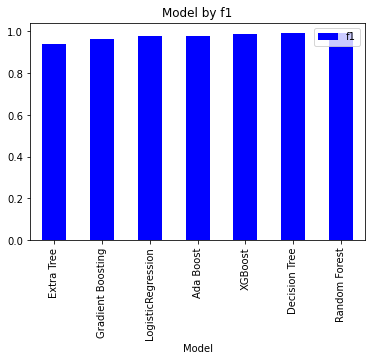

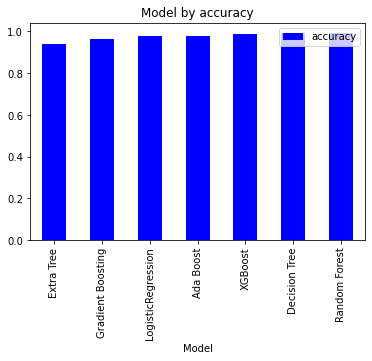

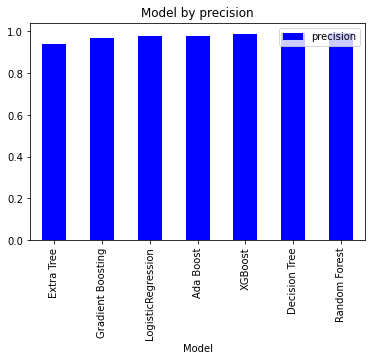

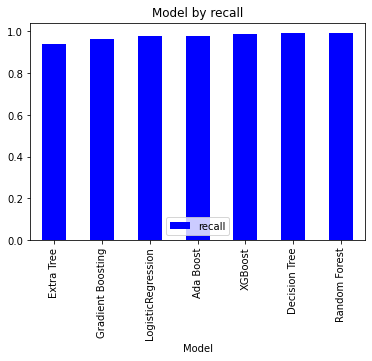

In [79]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'blue')
    plt.title(f"Model by {metric}")
    plt.show()

### Key observation:
Among our model we have Random Forest tops the chart.

1. accuracy = 0.992914
2. precision =0.992953
3. recall = 0.992914
4. f1 = 0.992915

In [80]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [81]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.91, 0.09],
       ...,
       [0.04, 0.96],
       [0.12, 0.88],
       [0.1 , 0.9 ]])

In [84]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

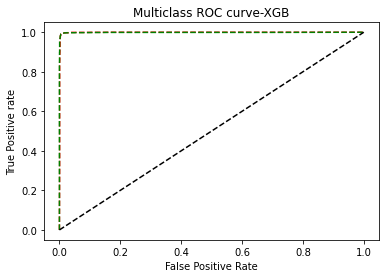

In [85]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [86]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [87]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,0,1
Real,,
0,7705,85
1,22,7288


In [88]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7790
           1       0.99      1.00      0.99      7310

    accuracy                           0.99     15100
   macro avg       0.99      0.99      0.99     15100
weighted avg       0.99      0.99      0.99     15100



### hyper parameter tune

In [89]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [90]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [91]:
clf_random.fit(x_train, y_train)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': range(20, 200, 20)}],
             scoring='f1_weighted', verbose=2)

In [92]:
clf_random.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 160}

In [93]:
clf_random.best_score_

0.9936430456402962

In [94]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7790
           1       0.99      1.00      0.99      7310

    accuracy                           0.99     15100
   macro avg       0.99      0.99      0.99     15100
weighted avg       0.99      0.99      0.99     15100



In [95]:
classifier_final_model = clf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test)
 
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1
Actual,,
0,2576,21
1,12,2425


### Saving the model.

In [97]:
import joblib
joblib.dump(classifier_final_model,"Fakenewsprediction.obj")

['Fakenewsprediction.obj']

### Conclusion:
    We have trained our model and hyper parameter tuned it and we have achived accuracy of 99%
Using this model we can classify the fake news perfectly.